In [26]:
## importing librarires
from sklearn.linear_model import LinearRegression,LassoCV ,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [22]:
## reading the csv file

df = pd.read_csv('train_BRCpofr.csv')

In [3]:
## Displaying top 5 rows
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
## shape of the dataset

df.shape

(89392, 12)

In [5]:
## checking info the table

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
## Checking for null values

df.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

### Observation
1. It is a good sign that there are no null values in the dataset

In [7]:
## Checking for duplicates

df.duplicated().sum()

0

### Observation
1. There are no duplicate values in the given dataset

In [8]:
## Describing the daataset

df.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [9]:
## Describing the categorical columms

df.describe(exclude='int')

,gender,area,qualification,income,num_policies,policy,type_of_policy
count,89392,89392,89392,89392,89392,89392,89392
unique,2,2,3,4,2,3,3
top,Male,Urban,High School,5L-10L,More than 1,A,Platinum
freq,50497,62455,46247,52716,60263,56644,47796


In [10]:
## Seperating the numerical features and categorical features

numerical_features=[feature for feature in df.columns if (df[feature].dtype!='O')]
categorical_features=[feature for feature in df.columns if feature not in numerical_features]

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

We have 7 categorical features : ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']


## Univariate analysis

### Exploring Numerical features

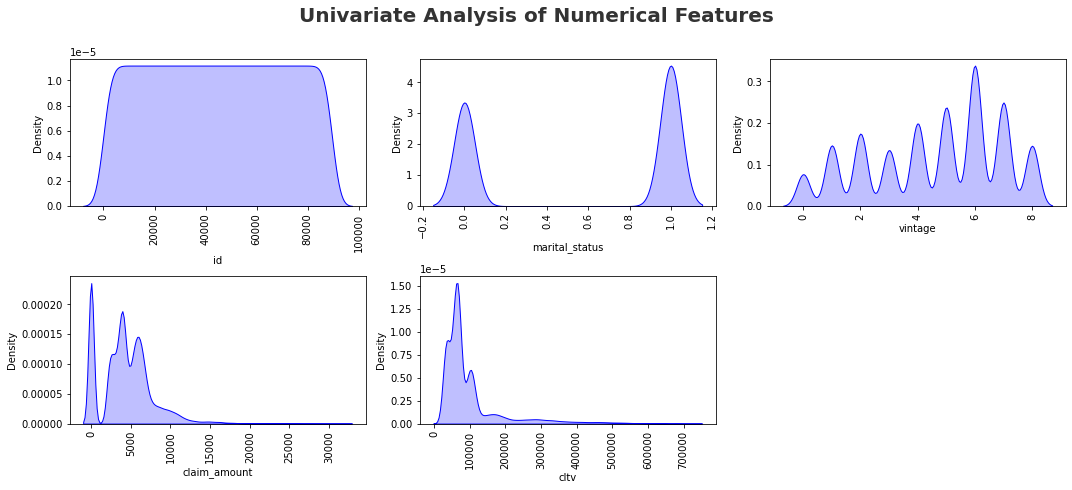

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

### Observation

1. Vintage feature can be converted to normal distribution.
2. Both claim amount and cltv features are left skewed

### Exploring categorical features

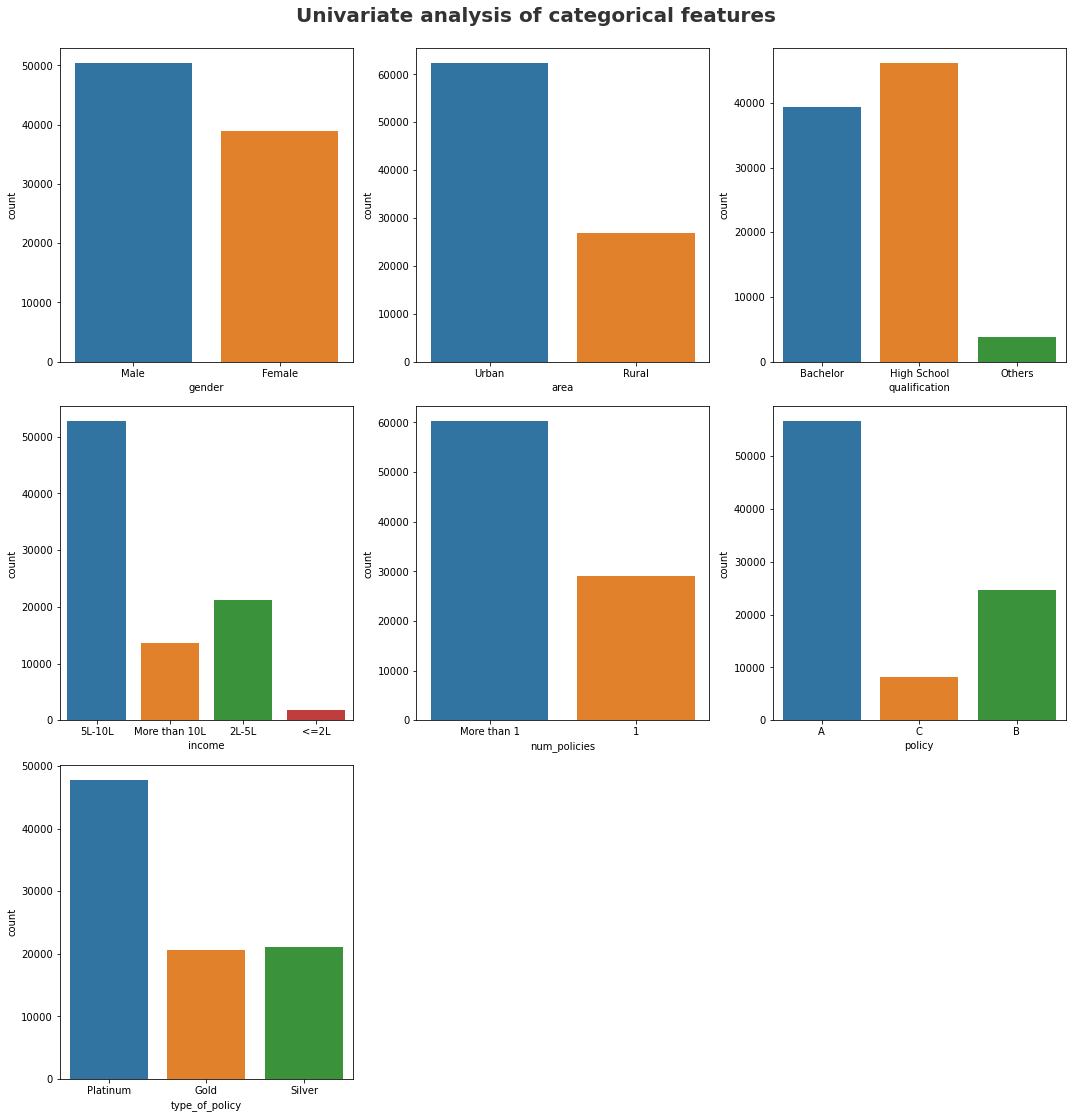

In [12]:
plt.figure(figsize=(15,25))
plt.suptitle('Univariate analysis of categorical features',fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

### Observation

1. income, num_policies, policy features are slightly imbalanced.

## Bivariate analysis

### Bivariate analysis of numerical features with target feature

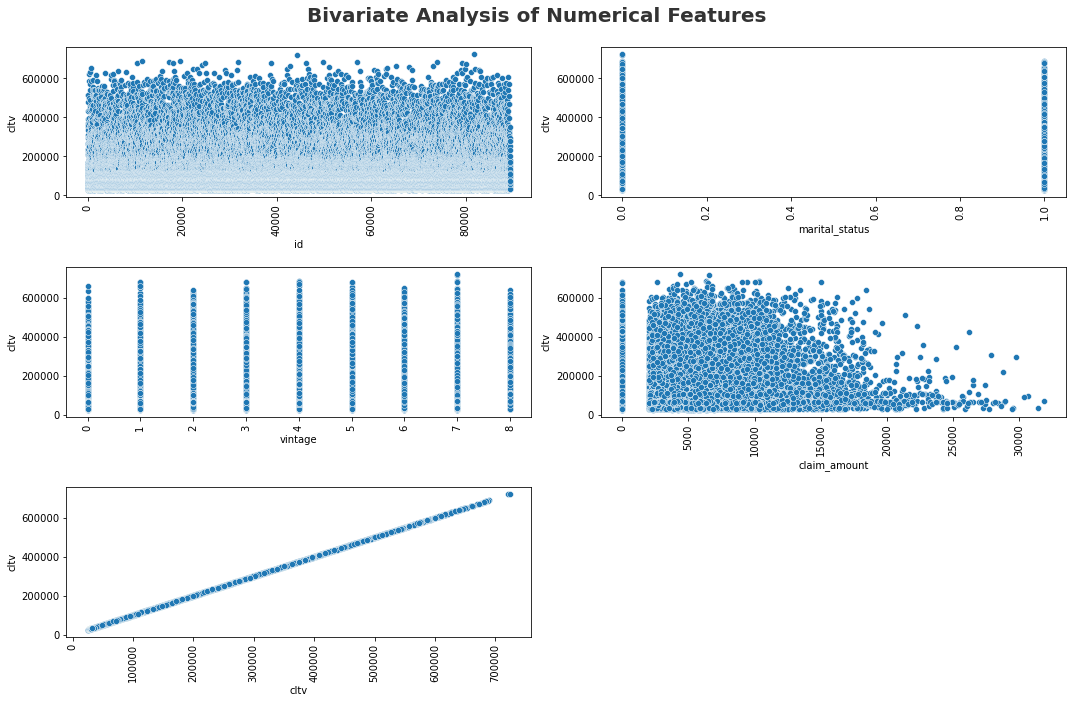

In [13]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(df[numerical_features[i]],df['cltv'])
    plt.xlabel(numerical_features[i])
    plt.ylabel('cltv')
    plt.xticks(rotation=90)
    plt.tight_layout()    

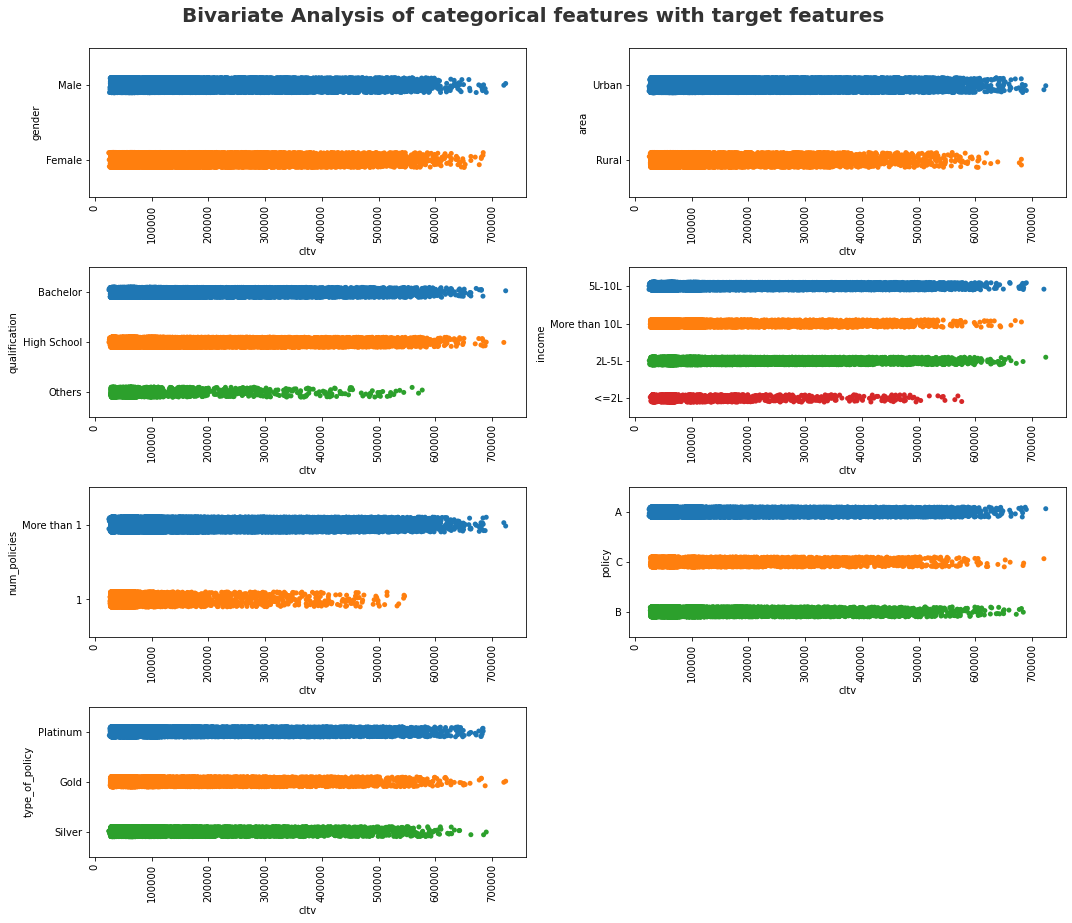

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of categorical features with target features ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.stripplot(df['cltv'],df[categorical_features[i]])
    plt.xlabel('cltv')
    plt.ylabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()  

### Observation

1 . people with 1 policy maximum cltv is between 5,00,000 and 6,00,000

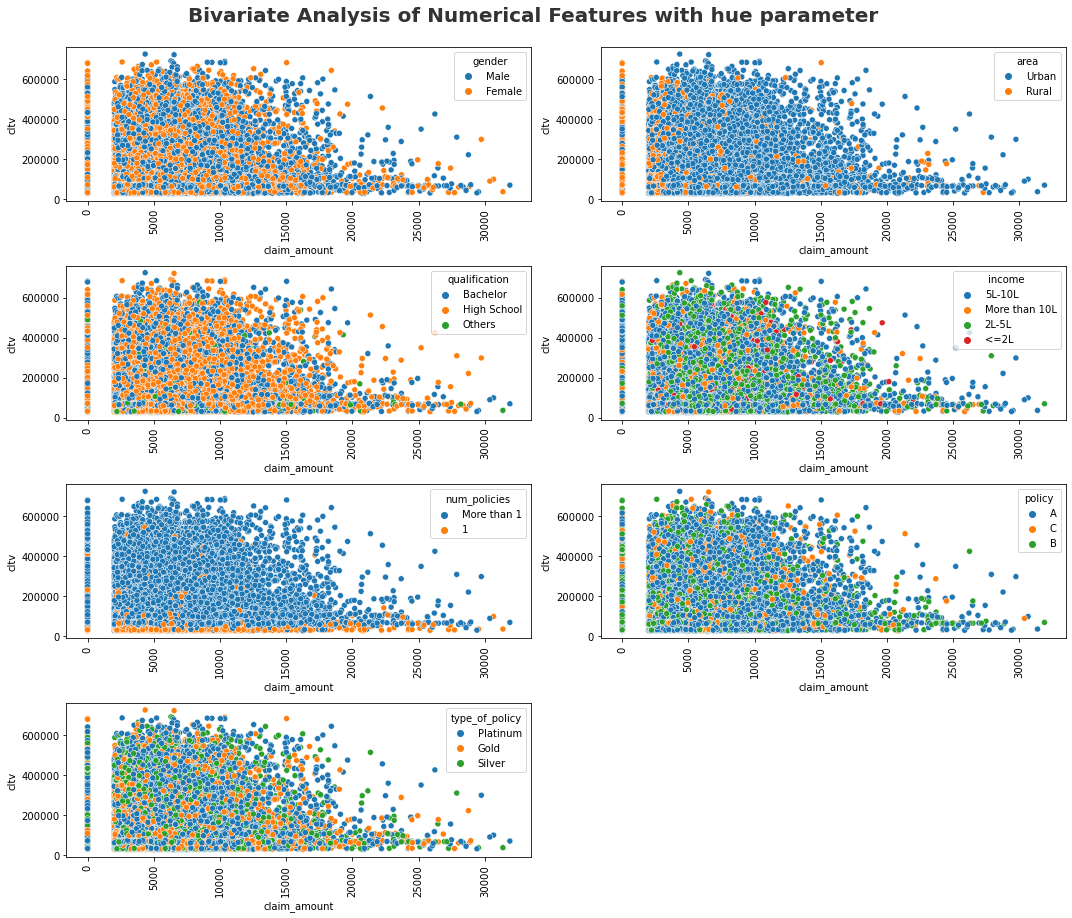

In [15]:
# plotting claim amount and cltv considering vintage as hue parameter

plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Features with hue parameter ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(df['claim_amount'],df['cltv'],hue=df[categorical_features[i]])
    plt.xlabel('claim_amount')
    plt.ylabel('cltv')
    plt.xticks(rotation=90)
    plt.tight_layout()    

#### Observation
1. We can clearly see that the people in urban areas have high cltv value.
2. And the people with more than 1 policy have higher cltv value.

## Boxplots

<AxesSubplot:>

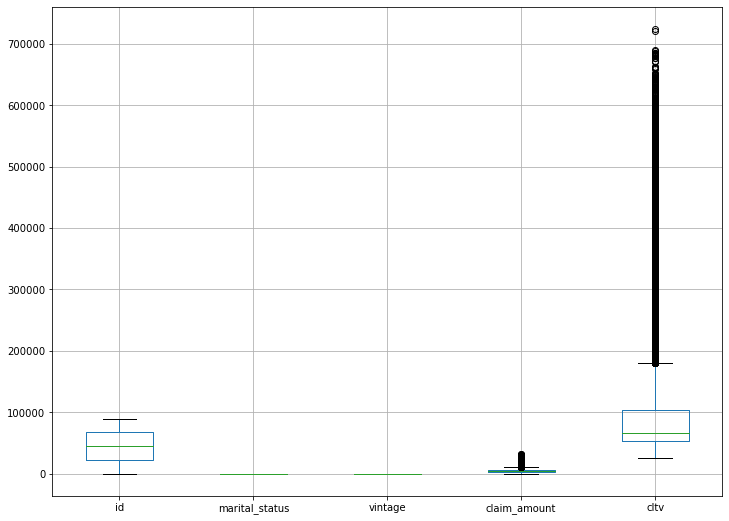

In [16]:
plt.figure(figsize=(12,9))
df[numerical_features].boxplot()

### Observation
1. We can consider that claim amount has some outliers

### Checking multi collinearity

<AxesSubplot:>

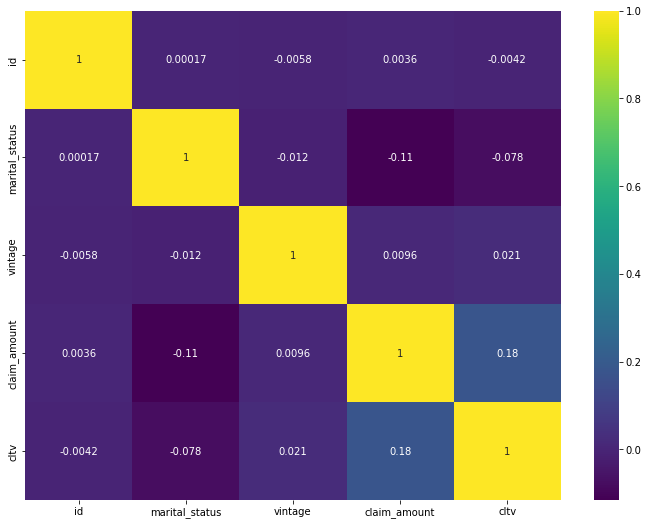

In [17]:
plt.figure(figsize=(12,9))
sns.heatmap(df[numerical_features].corr(),cmap='viridis',annot=True)

### Observation

1. We can see that there is no strong multi collinearity between the numerical features

## Model Building

In [24]:
def train_model(X,y,models):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
    
    train_r2_scores=[]
    test_r2_scores = []
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model
        
        y_train_pred = model.predict(X_train) # prediction on train data
        y_test_pred = model.predict(X_test)  # prediction on test data
        
    
        train_r2_score = r2_score(y_train,y_train_pred)
        test_r2_score = r2_score(y_test,y_test_pred)
        
        print(f"{list(models.keys())[i]} train accuracy score {train_r2_score}")
        print(f"{list(models.keys())[i]} test accuracy score {test_r2_score}")
        
        train_r2_scores.append(train_r2_score)
        test_r2_scores.append(test_r2_score)
        
    return pd.DataFrame(data =[train_r2_scores,test_r2_scores],columns=list(models.keys()))

In [19]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [21]:
df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...
89387,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [23]:
df.drop('id',axis=1,inplace=True)

In [30]:
## Evaluating 
encoder_variables =['gender','area','qualification','income','num_policies','policy',"type_of_policy"]
scaler_variables = ['claim_amount']
X,y = df.drop('cltv',axis=1),df['cltv']
ordinal_encoder = OrdinalEncoder()
standard_scaler = StandardScaler()
X[encoder_variables]=ordinal_encoder.fit_transform(X[encoder_variables])
X[scaler_variables]=standard_scaler.fit_transform(X[scaler_variables])

res=train_model(X,y,{"GradientBoostingRegressor":GradientBoostingRegressor()})

GradientBoostingRegressor train accuracy score 0.16599203751611236
GradientBoostingRegressor test accuracy score 0.1623254291092605


### Training and predicting on test data

In [31]:
train_x,train_y=df.drop('cltv',axis=1),df['cltv']
ordinal_encoder1 = OrdinalEncoder()
standard_scaler1 = StandardScaler()
train_x[encoder_variables]=ordinal_encoder1.fit_transform(train_x[encoder_variables])
train_x[scaler_variables]=standard_scaler1.fit_transform(train_x[scaler_variables])

In [32]:
test_data_main= pd.read_csv('test_koRSKBP.csv')
test_data = test_data_main.drop('id',axis=1)
test_data[encoder_variables] = ordinal_encoder1.transform(test_data[encoder_variables])
test_data[scaler_variables] = standard_scaler1.transform(test_data[scaler_variables])

In [36]:
grb = GradientBoostingRegressor()
grb.fit(train_x,train_y)

GradientBoostingRegressor()

In [39]:
res = pd.DataFrame(data=[test_data_main['id'],grb.predict(test_data)],index=['id','cltv'])

In [40]:
res.T.to_csv('submission1.csv',index=False)